In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [2]:
df=pd.read_csv(r"D:\ineuron\MachineLearningFiles\ML1\Logistics Reg\Logistic-regression_final\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


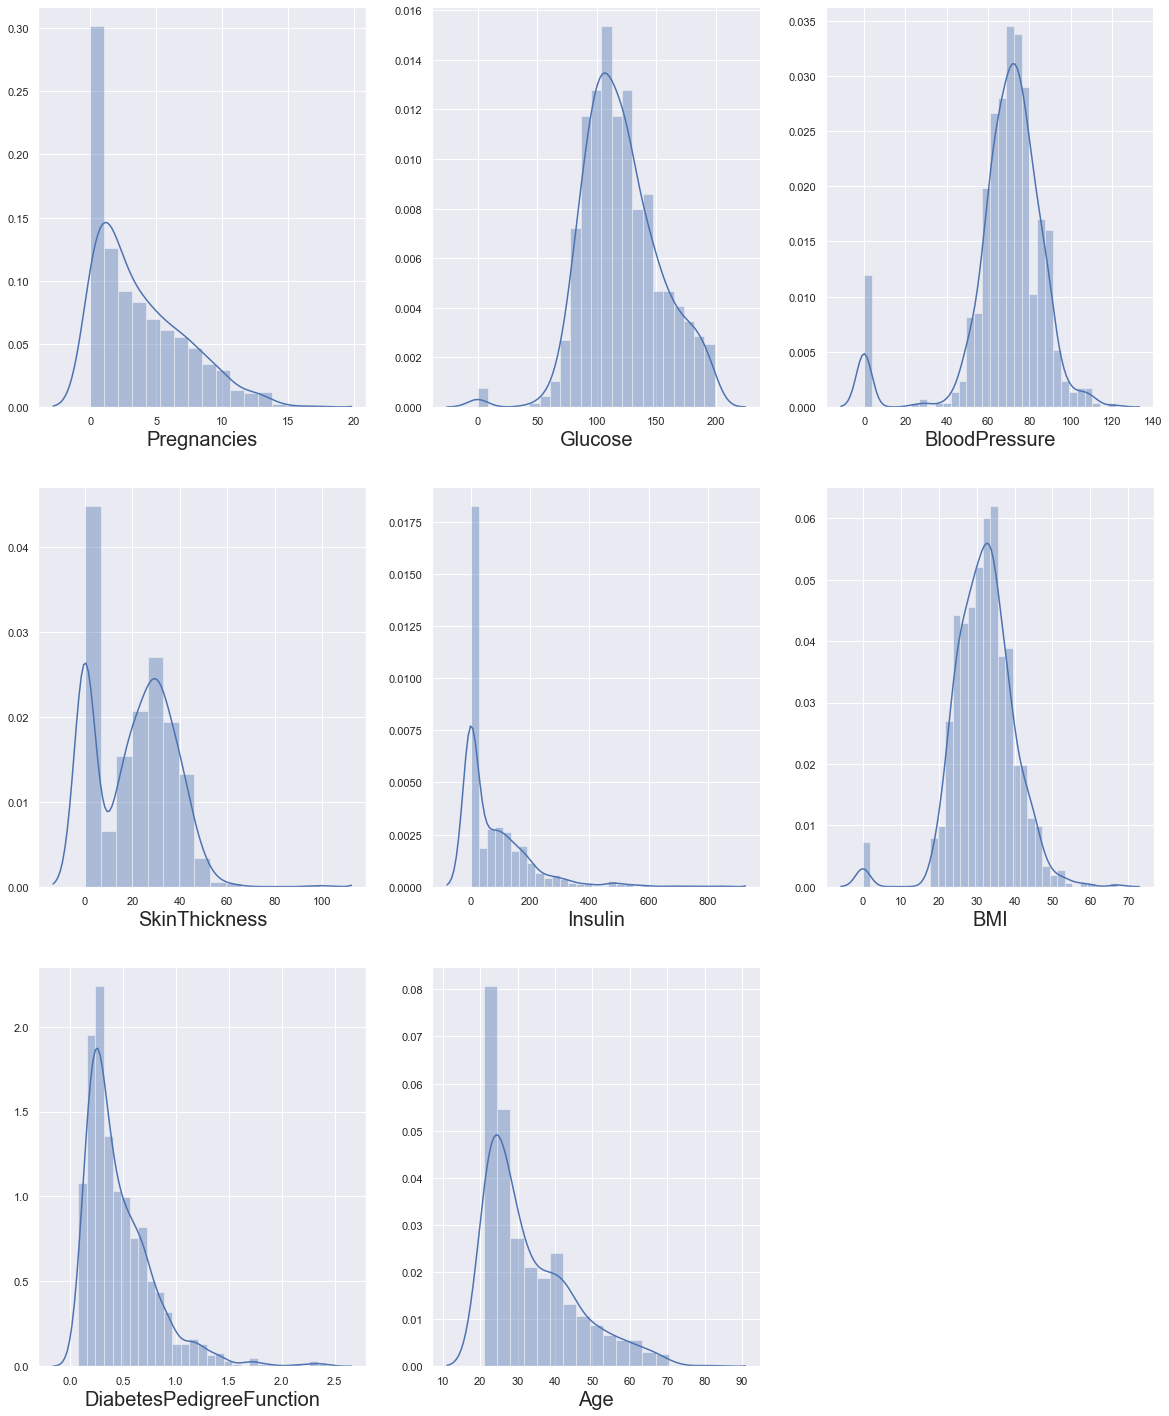

In [4]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in df.columns:
    if col != "Outcome":
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#There are not null vaues but there is zero vallues .BMI,Skinm etc . can't be zero so replace the 0 with mean values 
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


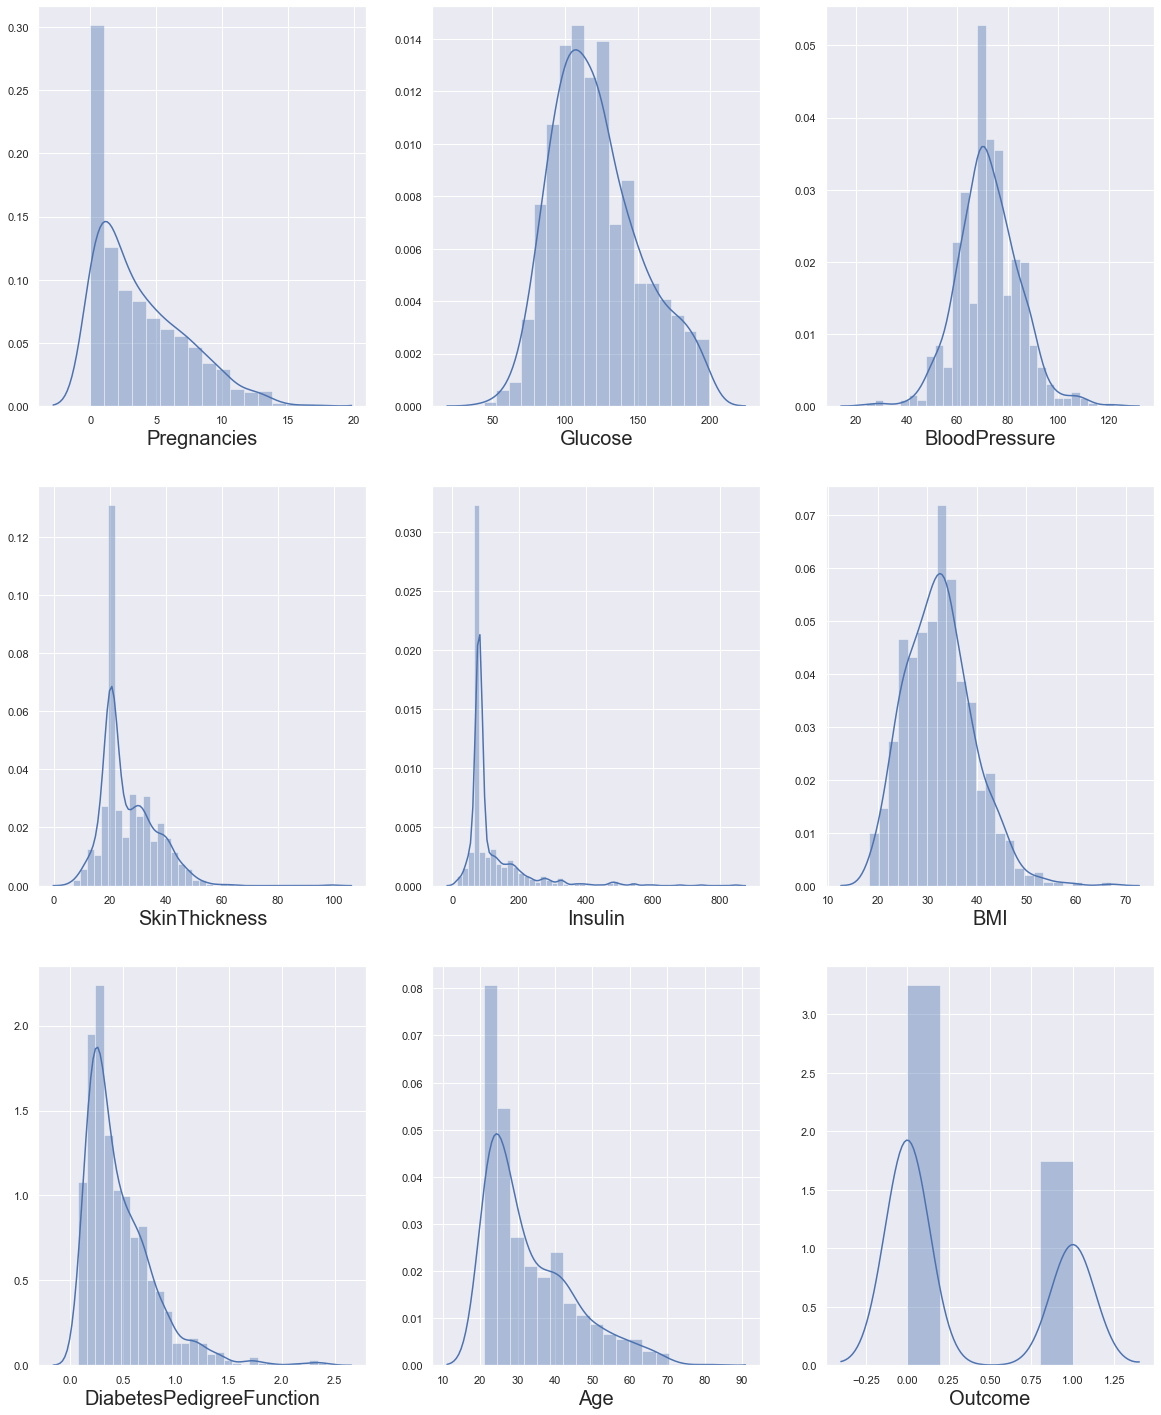

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

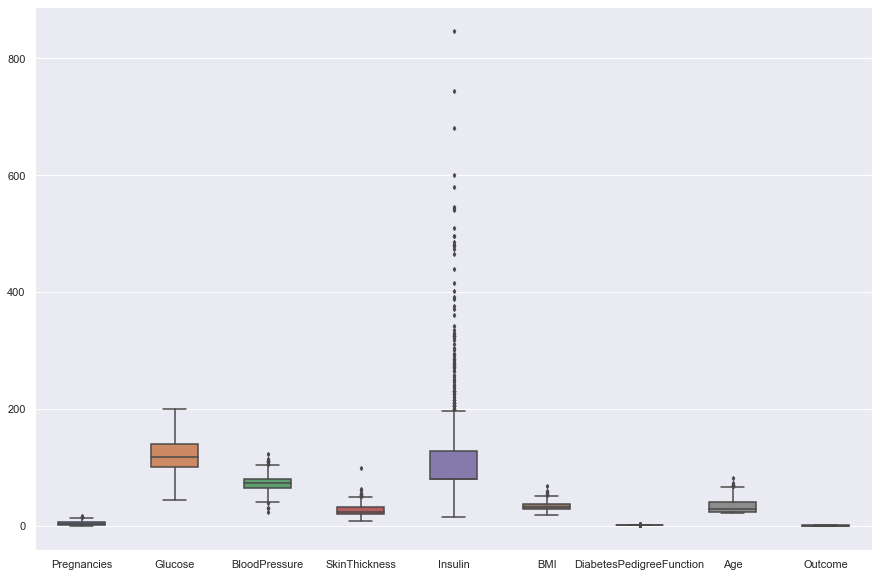

In [9]:
#Now Checking and removing the outlier
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [10]:
#Remove the outlier that is seen in the box plot
#Remove the outlier that is seen in the box plot
q=df["Pregnancies"].quantile(0.98)
data_cleaned=df[df["Pregnancies"]<q]

q=data_cleaned["BMI"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["BMI"]<q]

q=data_cleaned["SkinThickness"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["SkinThickness"]<q]

q=data_cleaned["Insulin"].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned["Insulin"]<q]

q=data_cleaned["DiabetesPedigreeFunction"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["DiabetesPedigreeFunction"]<q]

q=data_cleaned["Age"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["Age"]<q]

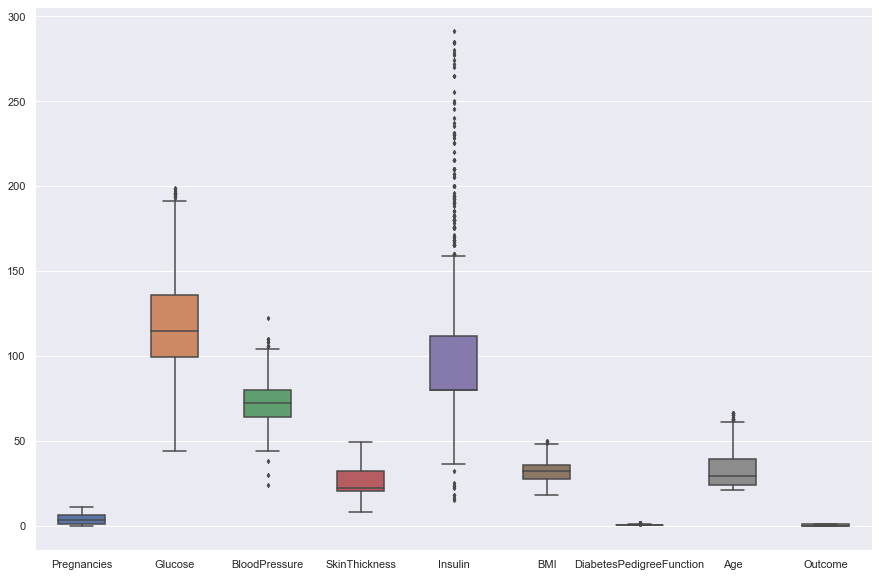

In [11]:
#Now Checking and removing the outlier
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned,width=0.5,ax=ax,fliersize=3)

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

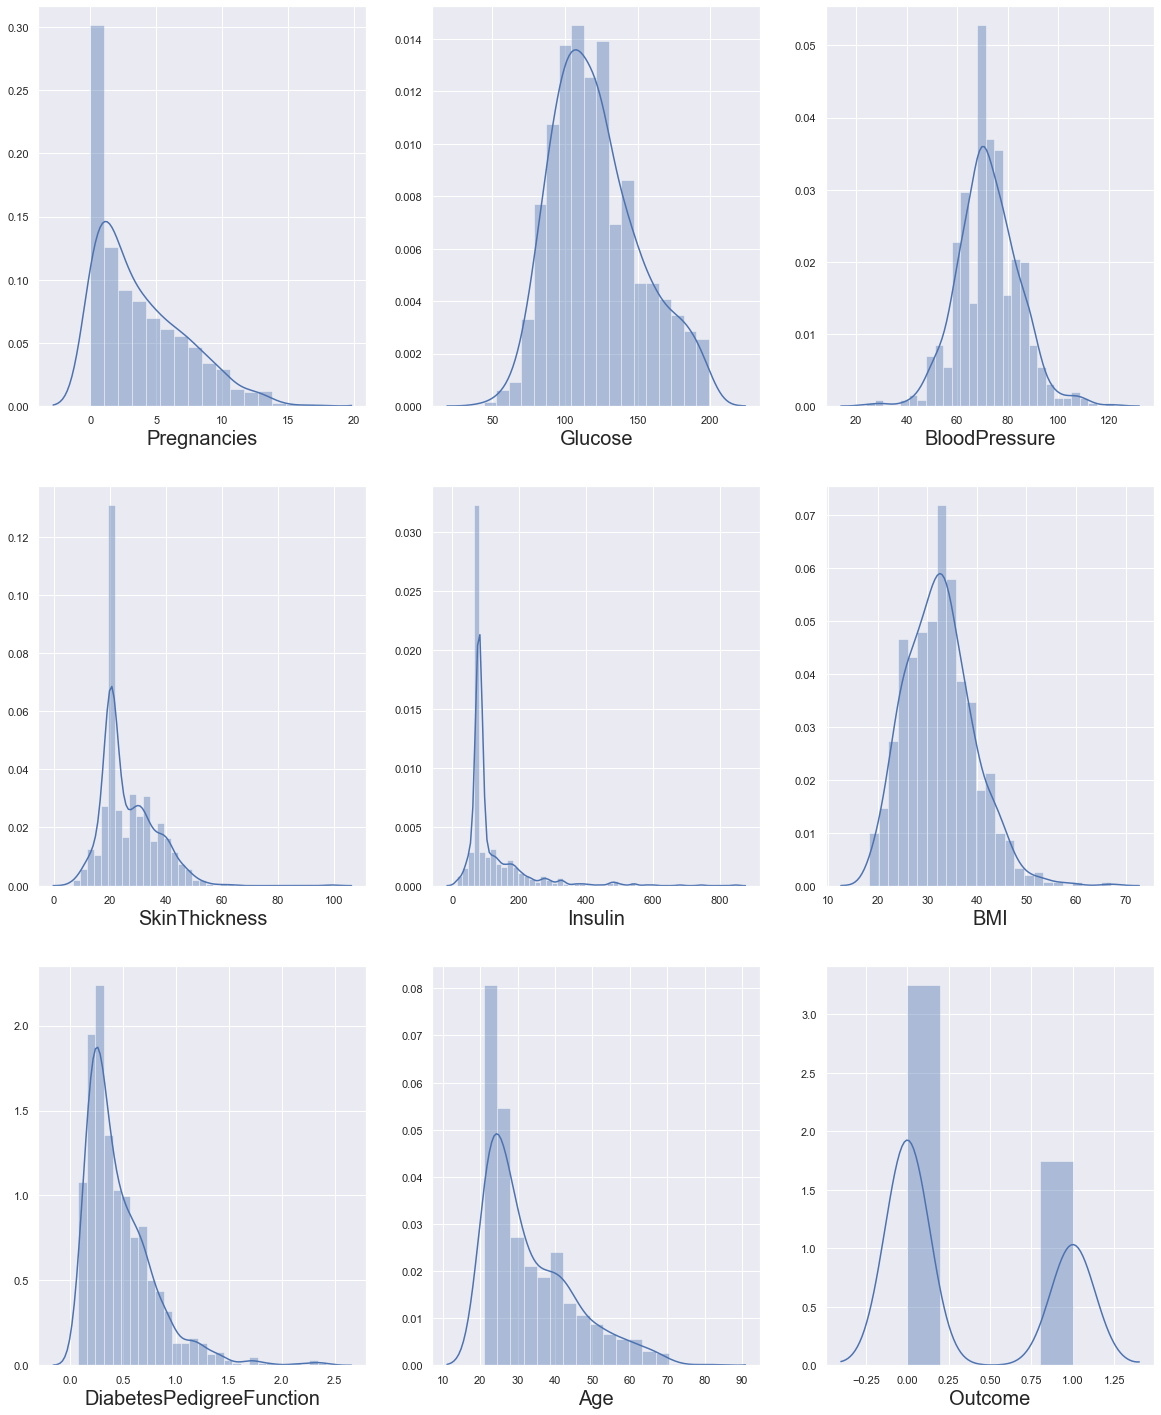

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [15]:
x=df.drop(columns=["Outcome"],axis=1)
y=df["Outcome"]

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

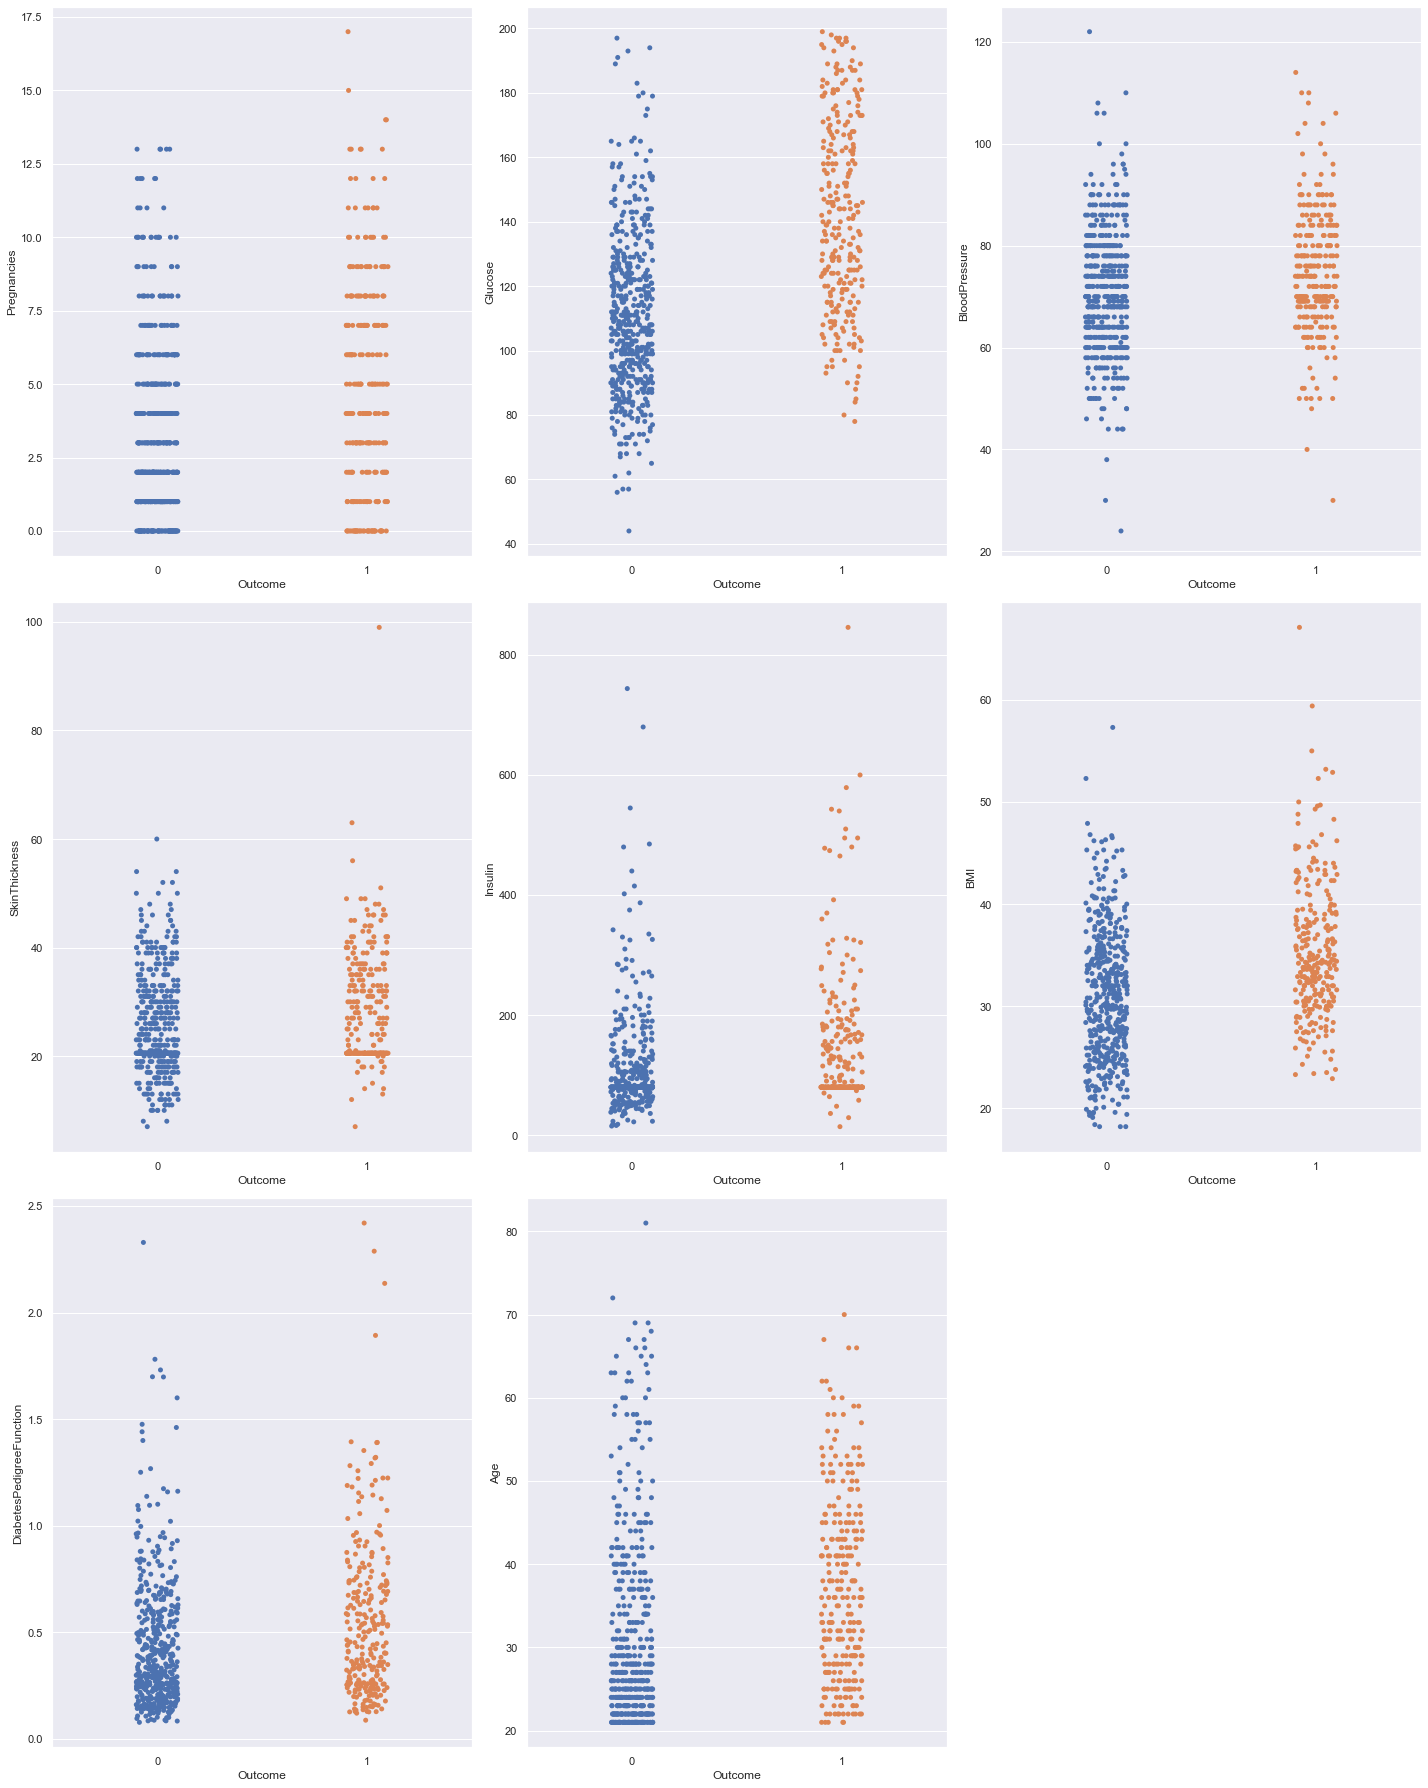

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[col])
    plotnumber+=1
plt.tight_layout()

In [19]:
scalar=StandardScaler()
x_Scaled=scalar.fit_transform(x)

In [20]:
x_Scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [21]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["vif"]=[variance_inflation_factor(x_Scaled,i) for i in range(x_Scaled.shape[1])]
vif
#As Vif is < 5 there is no multi colinearity 

,Features,vif
0,Pregnancies,1.431075
1,Glucose,1.347308
2,BloodPressure,1.247914
3,SkinThickness,1.450510
4,Insulin,1.262111
5,BMI,1.550227
6,DiabetesPedigreeFunction,1.058104
7,Age,1.605441


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.25,random_state=33)


In [29]:
x_train

array([[-1.14185152,  0.2406085 ,  3.11736583, ...,  5.0428933 ,
        -0.46170458, -0.61611067],
       [-1.14185152, -0.94297153, -1.01212132, ...,  0.41467589,
        -0.63083122, -0.70119842],
       [-0.54791859, -0.71283097, -0.18622389, ...,  1.17149131,
         0.61949791, -0.70119842],
       ...,
       [-0.54791859,  1.75296077,  1.30039148, ..., -1.39003782,
        -0.44056374, -0.95646168],
       [ 0.3429808 ,  1.45706576,  0.30931457, ...,  1.92830674,
        -0.39828208, -0.53102292],
       [-0.25095213,  0.14197684,  1.30039148, ...,  0.9968416 ,
         0.70104112, -0.53102292]])

In [30]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [33]:
import pickle
with open("ModelForPred.sav","wb") as f:
    pickle.dump(log_reg,f)
    
with open("StdScaler.sav","wb") as f:
    pickle.dump(log_reg,f)

In [51]:
filename="ModelForPred.sav"
load_model=pickle.load(open(filename,"rb"))
pred_y_fromfile=load_model.predict(x_test)
pred_y_fromfile

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
x_test

array([[-0.84488505,  0.43787184, -1.50765978, ..., -0.83698039,
         0.6496991 ,  2.44704844],
       [ 0.3429808 ,  0.47074907,  0.80485303, ..., -0.06669102,
         0.50775352,  3.04266271],
       [ 2.42174604, -1.23886654, -0.0210444 , ..., -0.40035611,
        -0.52814719,  1.08564439],
       ...,
       [-0.54791859, -1.27174376, -0.59917261, ...,  0.63298803,
         0.47453221, -0.78628618],
       [-0.54791859, -0.74570819, -0.260103  , ..., -1.49191682,
        -1.09894962, -0.87137393],
       [ 0.3429808 , -1.4690071 ,  0.80485303, ...,  0.4874466 ,
        -0.95398392,  0.14967911]])

In [53]:
y_pred=log_reg.predict(x_test)

In [54]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
y_test.head(30)

456    0
684    0
510    1
434    0
31     1
443    1
422    0
175    1
581    0
766    1
415    1
676    1
303    1
253    0
319    1
539    1
745    0
353    0
630    1
382    0
488    0
388    1
257    0
442    0
311    0
645    0
704    0
64     1
22     1
670    0
Name: Outcome, dtype: int64

In [57]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.75

In [58]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  13],
       [ 35,  35]], dtype=int64)

In [69]:
#Accuracy Calulation
#(109+35)/(109+35+35+13)
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [70]:
#Accuracy Calulation
#(109+35)/(109+35+35+13)
accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
accuracy

0.75

In [71]:
Precision=(true_positive/(true_positive+false_negative))
Precision

0.7569444444444444

In [72]:
Recall=(true_positive/(true_positive+false_positive))
Recall

0.8934426229508197

In [74]:
F1score=(2*(Precision*Recall))/(Precision+Recall)
F1score

0.8195488721804511

In [90]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_pred, y_pred)
auc

1.0

In [81]:
fpr,tpr,threshold=roc_curve(y_test,y_p)

pandas.core.series.Series

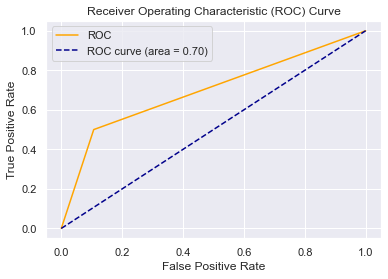

In [88]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()